선형 회귀 케라스 구현 하나의 Dense 층

In [2]:
import tensorflow as tf

#1 번 문제와 정답 데이터 지정
x_train = [1,2,3,4]
y_train = [2,4,6,8]

#2번 모델 구성(생성)
model = tf.keras.models.Sequential([
                                    #출력 , 입력= 여러개 원소의 일차원 배열, 그대로 출력
                                    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
                                    #Dense(1,input_dim=1)
])

선형 회귀 케라스 구현 확률적 경사하강법(optimizer='SGD') = 경사하강법의 계산량을 줄이기위해

mae = 평규 절대 오차  //가끔 사용할때가 있다.

mse = 오차 평균 제곱합

In [3]:
#3. 학습에 필요한 최적화 방법과 손실 함수 등 지정
#훈련에 사용할 옵티마이저와 손실함수 출력정보를 지정
#mean absoulte error, mean squard error
model.compile(optimizer='SGD', loss = 'mse',
              metrics=['mae', 'mse'])

In [4]:
#모델을 표시(시각화)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


히스토리 객체

매 에포크 마다의 훈련 손실값(loss)
훈련 정확도(accuracy)
검증 손실값(val_loss)
검증 정확도(val_acc)

In [5]:
#4 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장
history = model.fit(x_train,y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 8.0680 - mae: 2.5929 - mse: 8.0680
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 5.6032 - mae: 2.1521 - mse: 5.6032
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 3.8930 - mae: 1.7850 - mse: 3.8930
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.7062 - mae: 1.4792 - mse: 2.7062
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8827 - mae: 1.2244 - mse: 1.8827
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.3113 - mae: 1.0123 - mse: 1.3113
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9147 - mae: 0.8356 - mse: 0.9147
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6395 - mae: 0.6884 - mse: 0.6395
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4486 - mae: 0.5658 - mse: 0.4486
Epoch 10/500
1/1 [============================

성능평가

In [6]:
#5. 테스트 데이터로 성능 평가
x_test = [1.2,2.3,3.4,4.5]
y_test = [2.4,4.6,6.8,9.0]

print('손실', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 2ms/step - loss: 8.7699e-04 - mae: 0.0264 - mse: 8.7699e-04
손실 [0.000876988226082176, 0.02641671895980835, 0.000876988226082176]


예측

In [7]:
#x = [3.5,5,5.5,6] 예측
print(model.predict([3.5,5,5.5,6])) #출력값이 *2를 해주면 된다.

pred = model.predict([3.5,5,5.5,6])
#예측 값만 1차원으로

print(pred.flatten())
print(pred.squeeze())

[[ 6.9865546]
 [ 9.950532 ]
 [10.938524 ]
 [11.926517 ]]
[ 6.9865546  9.950532  10.938524  11.926517 ]
[ 6.9865546  9.950532  10.938524  11.926517 ]


손실과 mae 시각화

Text(0, 0.5, 'loss')

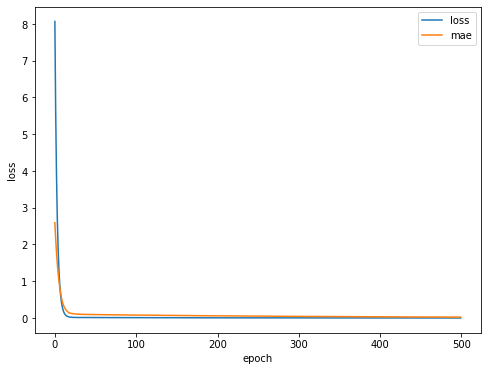

In [8]:
import matplotlib.pylab as plt

#그래프 그리기
fig = plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

예측 값 시각화

Text(0, 0.5, 'y')

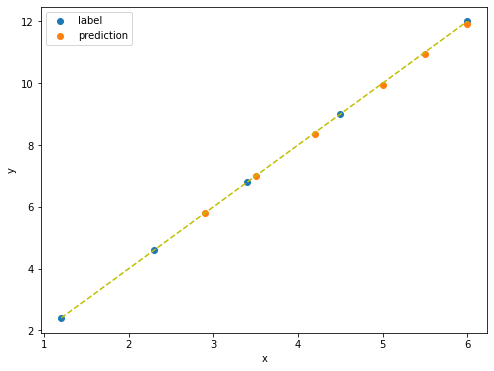

In [9]:
import matplotlib.pyplot as plt

x_test = [1.2,2.3,3.4,4.5,6.0]
y_test = [2.4,4.6,6.8,9.0,12.0]

#그래프 그리기
fig = plt.figure(figsize=(8,6))

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test,y_test, 'y--')

x=[2.9,3.5,4.2,5,5.5,6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

#label = 정답
#prediction = 정답에 맞는 1차원 그래프

전코드

In [10]:
#버전 1.x 만 가능
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#1번 문제와 정답 데이터 지정
x_train = [1,2,3,4]
y_train = [2,4,6,8]

#2번 모델 구성(생성)
model = Sequential([
                    Dense(1, input_shape=(1,), activation = 'linear')
                    #Dense(1, input_dim=1)
])

#3번 학습에 피ㅣㄹ요한 최적화 방법과 손실 함수등 지정
# 훈련에 사용할 옵티마이저와 손실 함수, 출력정보 선택
#Mean Absolute Eroor, mean squared error
model.compile(optimizer='SGD', loss='mse', metrics=['mae','mse'])

#모델을 표시(시각화)
model.summary()

#생성된 모델로 훈련 데이터 학습
model.fit(x_train,y_train, epochs=1000)

#5번 테스트 데이터로 성능 평가
x_test = [1.2,2.3,3.4,4.5]
y_test = [2.4,4.6,6.8,9.0]
print('정확도', model.evaluate(x_test,y_test))

print(model.predict([3.5,5,5.5,6]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 44.7413 - mae: 6.1061 - mse: 44.7413
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 31.0728 - mae: 5.0681 - mse: 31.0728
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 21.5884 - mae: 4.2034 - mse: 21.5884
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 15.0072 - mae: 3.4833 - mse: 15.0072
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 10.4405 - mae: 2.8834 - mse: 10.4405
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.2716 - mae: 2.3838 - mse: 7.2716
Ep

케라스로 예측
 y=2x+1 예측

In [11]:
#1. 케라스 패키지 임포트
import tensorflow as tf
import numpy as np

#2.데이터 지정
#훈련과 테스트 데이터
x= np.array([0,1,2,3,4])
y= np.array([1,3,5,7,9]) #y = x*2 +1


#3.인공신경망 모델 사용(구성)
model = tf.keras.models.Sequential()

#은닉 계층 하나 추가
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))

#4.#최적화 방법과 손실 함수 지정해 인공신경망 모델 생성
#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD:stochastic gradient descent)
#손실 함수(loss function): 평균 제곱 오차 (MSE: Mean square Error)
model.compile('SGD','mse')

#5. 생성된 모델로 훈련 데이터 학습
#생성된 모델로 훈련자료로 입력(x[:2])과 출력(y[:2])를 사용하여 학습
#키워드 매개변수 epoch: 훈련 반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#6. 성능평가
#테스트 자료의 결과 출력
print('Targets(정답):',y[3:])

#7. 테스트 데이터로 결과 예측
#학습된 모델로 테스트 자료로 겨로가를 예측 (model.predict) 하여 출력
print('Predictions(예측):',model.predict(x[3:]).flatten())

Targets(정답): [7 9]
Predictions(예측): [6.995632 8.992923]
